<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [47]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [10]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


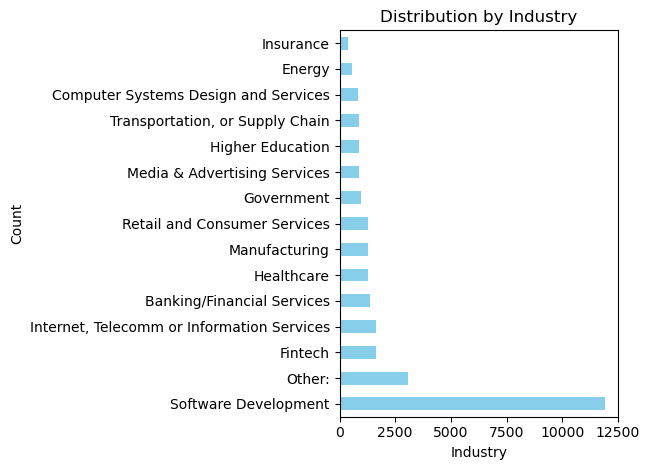

In [17]:
##Write your code here
df_industry = df[['Industry']].dropna()

industry_count = df_industry['Industry'].value_counts()

industry_count.plot(kind = 'barh', color = 'skyblue')
plt.title('Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [19]:
##Write your code here
comp_mean = df['ConvertedCompYearly'].mean()
comp_median = df['ConvertedCompYearly'].median()
comp_std = df['ConvertedCompYearly'].std()

threshold = comp_mean + 3 * comp_std

print(f'Mean of Converted Comp Yearly : {comp_mean}')
print(f'Meadian of Converted Comp Yearly : {comp_median}')
print(f'Standard Deviation of Converted Comp Yearly : {comp_std}')
print(f'3 Standard Deviation above the mean : {threshold}')

Mean of Converted Comp Yearly : 86155.28726264134
Meadian of Converted Comp Yearly : 65000.0
Standard Deviation of Converted Comp Yearly : 186756.9730862951
3 Standard Deviation above the mean : 646426.2065215267


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


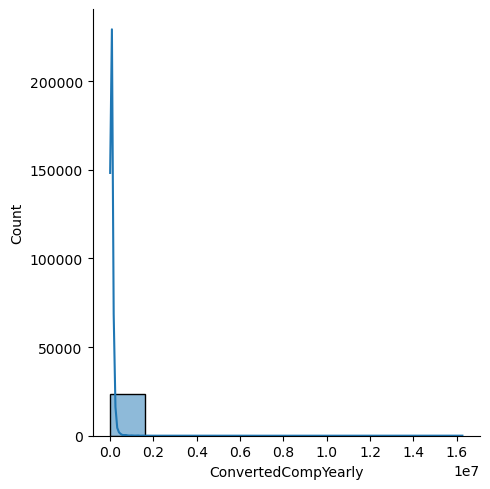

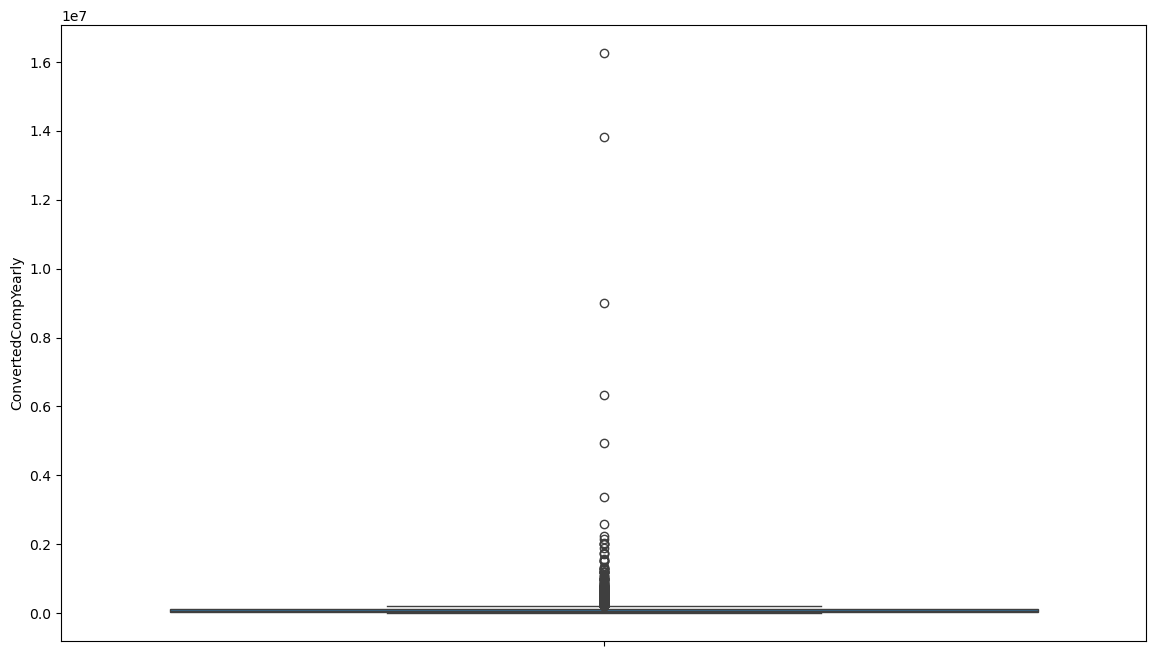

In [38]:
##Write your code here
sns.displot(df['ConvertedCompYearly'],bins = 10, kde = True)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(df['ConvertedCompYearly'])
plt.show()

percentile25 = df['ConvertedCompYearly'].quantile(0.25)
percentile75 = df['ConvertedCompYearly'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [42]:
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [41]:
upper_outlier = df[df['ConvertedCompYearly'] > upper_limit]
lower_outlier = df[df['ConvertedCompYearly'] < lower_limit]
print(f'IQR : {iqr}')
print(f'25th Percentile : {percentile25}')
print(f'75th Percentile : {percentile75}')
print(f'Upper Limit : {upper_limit}')
print(f'Lower Limit : {lower_limit}')
print(f'Number of Higher Outlier :\n {upper_outlier}')
print(f'Number of Lower Outlier : {lower_outlier}')

IQR : 75259.5
25th Percentile : 32712.0
75th Percentile : 107971.5
Upper Limit : 220860.75
Lower Limit : -80177.25
Number of Higher Outlier :
        ResponseId                      MainBranch              Age  \
428           429  I am a developer by profession  25-34 years old   
456           457  I am a developer by profession  45-54 years old   
461           462  I am a developer by profession  45-54 years old   
529           530  I am a developer by profession  25-34 years old   
545           546  I am a developer by profession  35-44 years old   
...           ...                             ...              ...   
40952       40953  I am a developer by profession  35-44 years old   
41000       41001  I am a developer by profession  35-44 years old   
41001       41002  I am a developer by profession  45-54 years old   
41027       41028  I am a developer by profession  55-64 years old   
41187       41188  I am a developer by profession  55-64 years old   

                

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [45]:
##Write your code here
df_no_outlier = (df[(df['ConvertedCompYearly'] >= lower_limit) &
                    (df['ConvertedCompYearly'] <= upper_limit) ])

print(df.shape)
print(df_no_outlier.shape)

(65437, 114)
(22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [55]:
##Write your code here

age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Create a new numeric Age column
df['Age_numeric'] = df['Age'].map(age_map)

# Drop rows where Age_numeric is NaN (if any)
df_corr_age = df.dropna(subset=['Age_numeric'])

numeric_cols = df_corr_age.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()['Age_numeric'].sort_values(ascending= False)
corr_matrix

Age_numeric            1.000000
WorkExp                0.850866
ConvertedCompYearly    0.121474
JobSat                 0.069908
CompTotal             -0.002764
JobSatPoints_1        -0.027975
ResponseId            -0.037923
JobSatPoints_8        -0.046182
JobSatPoints_6        -0.050314
JobSatPoints_4        -0.075979
JobSatPoints_9        -0.081673
JobSatPoints_7        -0.082747
JobSatPoints_5        -0.101526
JobSatPoints_11       -0.107149
JobSatPoints_10       -0.114361
Name: Age_numeric, dtype: float64

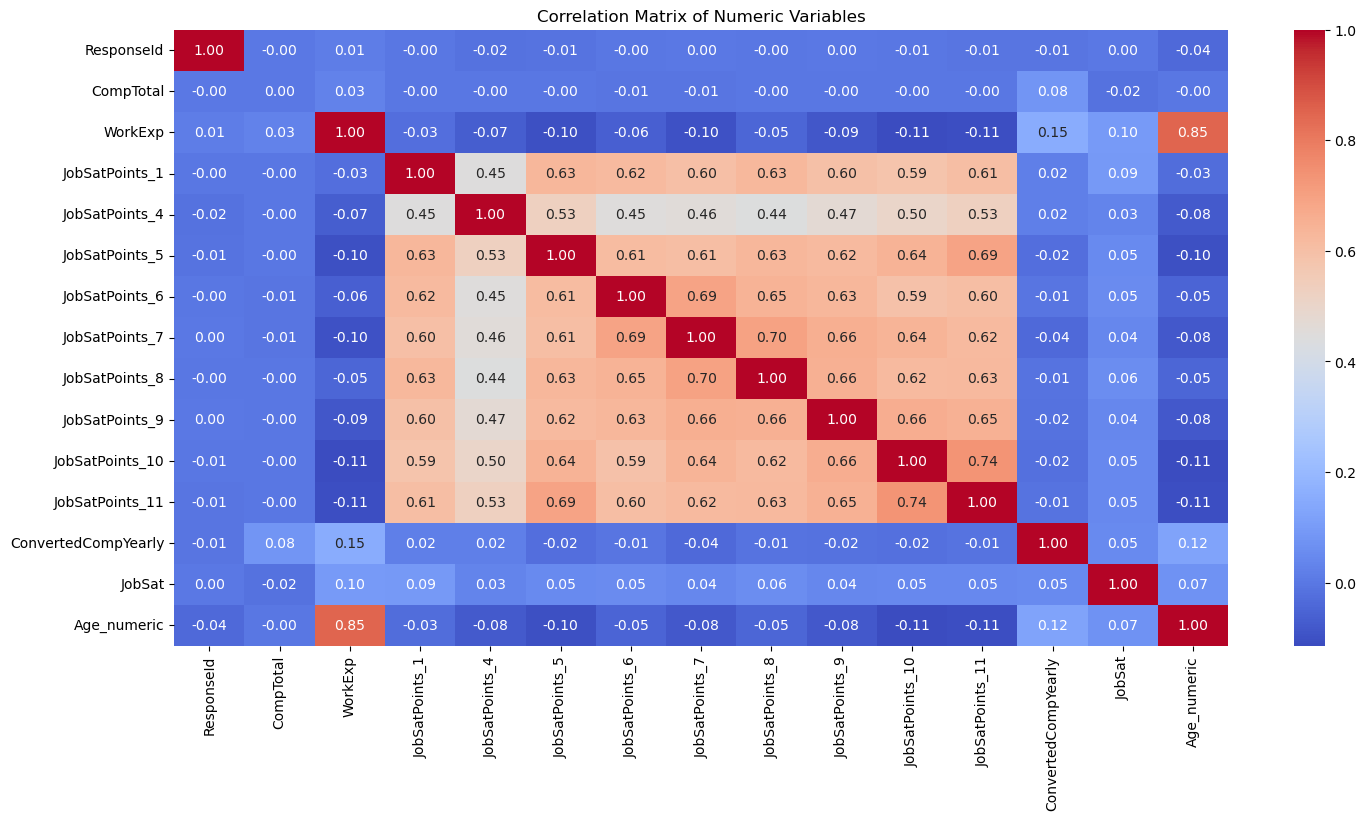

In [58]:
plt.figure(figsize = (17, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
